 ### Option 1: Load CIFAR 10 (Locally) using load_cifar_10.py file

In [592]:
from load_cifar_10 import load_data

In [593]:
(x_train, y_train), (x_test, y_test) = load_data('cifar-10-batches')

In [594]:
print('X_train Shape: ', x_train.shape)
print('X_test Shape: ', x_test.shape)

print('Y_train Shape: ', y_train.shape)
print('Y_test Shape: ', y_test.shape)

X_train Shape:  (50000, 32, 32, 3)
X_test Shape:  (10000, 32, 32, 3)
Y_train Shape:  (50000, 1)
Y_test Shape:  (10000, 1)


### Option 2: Load CIFAR 10 (from Cloud) using keras library

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print('X_train Shape: ', x_train.shape)
print('X_test Shape: ', x_test.shape)

print('Y_train Shape: ', y_train.shape)
print('Y_test Shape: ', y_test.shape)

X_train Shape:  (50000, 32, 32, 3)
X_test Shape:  (10000, 32, 32, 3)
Y_train Shape:  (50000, 1)
Y_test Shape:  (10000, 1)


In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

x_train = x_train/255
x_test = x_test/255


In [5]:
#Step3 Scaling
x_train = x_train.reshape(50000,3072)
x_test = x_test.reshape(10000,3072)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [6]:
#Step4 One hot encoding
y_train_x1 = y_train
y_test_x1 = y_test
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [7]:
def softmax(arr):
    x = np.exp(arr)
    return x/np.sum(x,axis=0)
def sigmoid(arr):
    sig = 1/(1+np.exp(-arr))
    return sig

In [8]:
#SLA 
x_train = x_train *.0001
x_test = x_test *.0001
#step 5 Initialization of hyper paramaters
learning_rate = .02
epochs = 1000
number_of_features = 32*32*3
number_of_nuerons = 50
number_of_outputs = 10
CCE_train = []
CCE_val = []
acc_track =[]
acc_val=[]
W1 = np.random.random ([number_of_nuerons,number_of_features]) * 100
#100x3072
W2 = np.random.random([number_of_outputs,number_of_nuerons])* 10#10x100
B1 = np.zeros(number_of_nuerons) #n numer of liner equations #100 
B1 = B1.reshape(number_of_nuerons,1)
B2 = np.zeros(number_of_outputs)
B2 = B2.reshape(10,1)# 10
#step6
for i in range(epochs):
#6.1
    a1 = sigmoid(np.dot(W1,x_train.T)+B1)
    print(a1.shape)
    y_pred = softmax(np.dot(W2,a1)+B2)  
    a1_val = sigmoid(np.dot(W1,x_test.T)+B1)
    y_pred_val = softmax(np.dot(W2,a1_val)+B2)
    
#6.2
    loss = -np.sum(np.multiply(y_train,np.log(y_pred).T))
    
    val_loss = -np.sum(np.multiply(y_test,np.log(y_pred_val).T))
    
    
    CCE_train.append(loss)
    CCE_val.append(val_loss)
#6.3

    #dw1
    x = np.multiply((1-a1),a1)
    pt2 = np.dot((y_pred.T-y_train),W2)
    dw1 = np.multiply(x.T,pt2)
    dw1 = np.dot(dw1.T,x_train)/50000 
    
    #db1
    x = np.multiply((1-a1),a1)
    pt2 = np.dot((y_pred.T-y_train),W2)

    db1 = np.multiply(x.T,pt2)
    db1 = np.sum(db1,axis=0)/50000
    db1 = db1.reshape(number_of_nuerons,1)

    
    #dw2
    dw2 = np.dot((y_pred.T - y_train).T,a1.T)/ 50000

    
    
    #db2
    db2 = np.sum(y_pred.T-y_train,axis=0)/50000
    db2 = db2.reshape(10,1)

    
 
    #6.4
    W1 = W1- learning_rate *dw1
    W2= W2- learning_rate *dw2
    B1 = B1 - learning_rate * db1
    B2= B2 - learning_rate *db2
    
    
    #calc accuracy at each epoch and store it.
    acc = y_pred.T.argmax(axis=1)
    accuracy = accuracy_score(y_train_x1,acc)
    acc_track.append(accuracy)
    
    acc = y_pred_val.T.argmax(axis=1)
    accuracy = accuracy_score(y_test_x1,acc)
    acc_val.append(accuracy)

(50, 50000)
(50, 50000)
(50, 50000)
(50, 50000)
(50, 50000)


KeyboardInterrupt: 

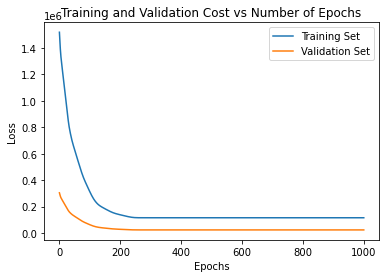

In [600]:
plt.title('Training and Validation Cost vs Number of Epochs')
plt.plot(CCE_train, label='Training Set')
plt.plot(CCE_val, label='Validation Set')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

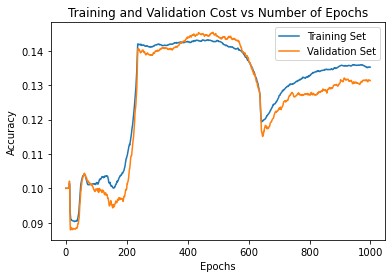

0.13524


In [601]:
plt.title('Training and Validation Cost vs Number of Epochs')
plt.plot(acc_track, label='Training Set')
plt.plot(acc_val, label='Validation Set')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(acc_track[999])

In [583]:
#USLA
#step 8
input_img = tf.keras.Input(shape=(32,32,3))


x = tf.keras.layers.Conv2D(4, (3, 3), activation='relu', padding='same')(input_img)
x= tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(2, (3, 3), activation='relu', padding='same')(x)
encoder = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(2, (3, 3), activation='relu', padding='same')(encoder)
x = tf.keras.layers.UpSampling2D((2, 2))(x)

x = tf.keras.layers.Conv2D(4, (3, 3), activation='relu',padding ='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoder = tf.keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.Model(input_img, decoder)
optim = tf.keras.optimizers.SGD(learning_rate=0.1, name='SGD')
autoencoder.compile(optimizer=optim, loss='binary_crossentropy') 
 
autoencoder.summary()

autoencoder.fit(x_train, x_train, epochs=45, batch_size=128,validation_data=(x_test, x_test))

decoded_imgs = autoencoder.predict(x_test)

n = 10

Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 32, 32, 4)         112       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 4)         0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 16, 16, 2)         74        
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 8, 2)           0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 8, 8, 2)           38        
_________________________________________________________________
up_sampling2d_14 (UpSampling (None, 16, 16, 2)       

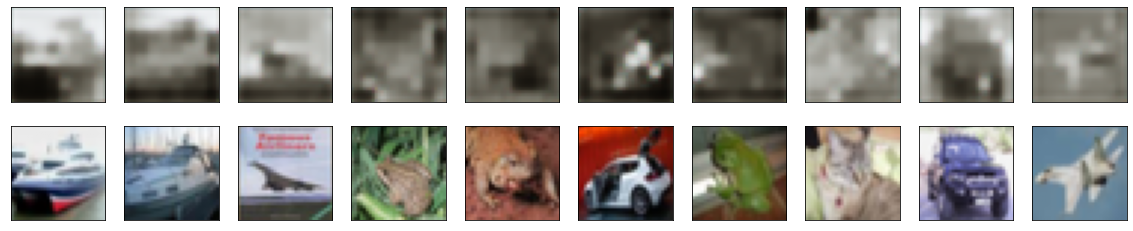

In [584]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(decoded_imgs[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(x_test[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [585]:
encoder = tf.keras.Model(input_img, encoder)
encoded_image = encoder.predict(x_train)


In [586]:
encoded_image = encoded_image.reshape(50000,128)

In [587]:
#step 9
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 10,random_state=0).fit(encoded_image)


In [588]:
#step 9
train_predictions = kmeans.labels_
print(train_predictions)

[8 2 1 ... 1 5 6]


In [589]:
#Step 10 Train confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train,train_predictions)
print(confusion_matrix)    

[[ 688  345  601   77 1230  781  589  330   92  267]
 [ 190  752  768  233  265  507  491  883  375  536]
 [ 699  215  803  257  512  189  537  687  310  791]
 [ 731  275  603  378  321  137  472  665  757  661]
 [ 691  206  736  241  158  194  360  637  841  936]
 [ 811  156  877  278  219  104  370  626  931  628]
 [ 467  137  697  474  232   46  466 1126  524  831]
 [ 679  452  554  178  164  217  865  311  600  980]
 [ 316  698  961   58  303 1571  391  353  208  141]
 [ 150 1463  540   55  206  739  826  402  133  486]]


In [590]:
#Train accuracy
maxVals = np.max(confusion_matrix,1)
accuracy = np.sum(maxVals) / np.sum(confusion_matrix) * 100
print(accuracy)

21.36


In [591]:
#Test accuracy & confusion matrix

test = encoder.predict(x_test)
test = test.reshape(10000,128)
kmeans = KMeans(n_clusters = 10,random_state=0).fit(test)
test_pred = kmeans.labels_
print(train_predictions)
from sklearn.metrics import confusion_matrix
test_matrix = confusion_matrix(y_test,test_pred)
print(test_matrix) 

maxVals = np.max(test_matrix,1)
accuracy = np.sum(maxVals) / np.sum(test_matrix) * 100
print(accuracy)

[8 2 1 ... 1 5 6]
[[ 77  26  14 256 175  35 106 141 116  54]
 [160  59  72  51  47 133  85  94 161 138]
 [ 40  59  55  99 161 133  62  49 270  72]
 [ 58 138  96  66 115 114  79  31 180 123]
 [ 46 173  67  23 123 166  59  26 264  53]
 [ 33 144  60  39 170  92  83  27 173 179]
 [ 29  81 126  44  71 174  92  16 236 131]
 [115 139  47  35 102  72 160  61 202  67]
 [207  39  19  46 102  30  50 318 103  86]
 [289  34  13  49  29  85 137 162 150  52]]
23.549999999999997
